## A Deep Dive Into the Diversity of San Francisco Film Locations, 1915 - 2023

I moved to San Francisco in 2010. I love the city dearly and am proud to call it my home. Its reputation has suffered recently, in large part due to biased national news reporting. But perhaps the news isn’t wholly to blame for this misperception.

The longer I’ve lived here, the more I’ve come to realize that the San Francisco that’s so often portrayed in films and television tends to be limited to small pockets of the city. So perhaps the average American’s media-driven perception of how San Francisco “used to be” feeds into this skewed viewpoint of a city in decline. I decided to undergo an analysis of city filming locations to answer the following questions:

1. How have the number and scope of citywide filming locations changed over time?
2. How do the most-filmed districts correlate with actual San Francisco demographics?
3. Which titles offer the most diverse and balanced portrayals of San Francisco?
4. How does diversity of SF portrayal correlate to the most popular and profitable films and television shows?

Data sources: 
* SF Film Locations: DataSF, Open data project https://data.sfgov.org/Culture-and-Recreation/Film-Locations-in-San-Francisco/yitu-d5am/about_data 
* Film budget and popularity: https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies 

### Data Cleaning
The DataSF film locations dataset required extensive cleaning prior to conducting my analysis. While extremely comprehensive, the information was messy, inconsistent, and in some cases, incomplete. I took the following steps:

- Removed a handful of duplicate entries
- Removed non-SF locations (in Marin, East Bay, South Bay -- except SF-adjacent points of interest like Golden Gate Bridge, Alcatraz, and the Bay Bridge)
- Thorough standardization of locations
    - Cleaned up addresses
        - Converted entries with intersections to addresses
        - Converted entries with ranges of blocks to a single centered address
        - Split out entries with multiple locations noted
        - A few nonsensical locations deleted (ie - streets that don't intersect, streets that don't exist in the city)
    - Corrected street and landmark misspellings (ie - “Chrissy” Field, “Delores” Park)
    - Generated lat/long coordinates using the [Geocode for Sheets](https://workspace.google.com/marketplace/app/geocode_for_sheets_mapping_sheets/1083994590944) plugin
    - Adjusted location names to be uniform across multiple entries
- Standardized film/TV titles (in the case of television shows filming across multiple episodes and/or seasons)
- Input missing Supervisor District info where applicable
- Renamed columns to remove spaces (for easier SQL import)

As a nice contrast, a quick inspection of the Kaggle film database in SQL revealed the data to be in good shape for immediate analysis.

### Analysis
#### Part I: General Film Location Stats
Most popular filming locations:
```
SELECT Locations,
COUNT(DISTINCT Title) AS n_films
FROM film_locations_sf
GROUP BY Locations
ORDER BY n_films DESC;
```
| **locations** | **n_films** |
|-----------|---------|
| **Fairmont Hotel** | 28 |
| **Golden Gate Bridge** | 27 |
| **City Hall** | 27 |
| **Palace of Fine Arts** | 19 |
| **Treasure Island** | 14 |
| **Coit Tower** | 13 |
| **Pier 7** | 12 |
| **Ferry Building** | 11 |
| **Dolores Park** | 10 |
| **St. Peter & Paul's Church** | 10 |
| **Grace Cathedral Episcopal Church (1100 California Street)** | 10 |
| **Chinatown** | 10 |
| **Fort Point** | 10 |
| **Bay Bridge** | 9 |
| **Lombard & Hyde Streets** | 9 |
| **Golden Gate Park** | 9 |
| **Hall of Justice** | 8 |
| **Postcard Row (Alamo Square, Hayes Valley)** | 8 |
| **Washington Square Park** | 8 |
| **SF War Memorial Opera House** | 8 |
| **California Academy of Sciences (Golden Gate Park)** | 8 |
| **Bank of America Building (555 California Street)** | 7 |
| **Vallejo St. Garage, 766 Vallejo St.** | 7 |
| **Presidio** | 7 |

Titles with the most SF filming locations:
```
SELECT Title, 
COUNT(DISTINCT Locations) as n_locations
FROM film_locations_sf
GROUP BY Title
ORDER BY n_locations DESC;
```

| **title**                               | **n_locations** |
| --------------------------------------- | --------------- |
| **Chance**                              | 96              |
| **Looking**                             | 93              |
| **Murder in the First**                 | 57              |
| **Sense8**                              | 43              |
| **Jexi**                                | 39              |
| **DEVS**                                | 35              |
| **The Last Black Man in San Francisco** | 33              |
| **Nash Bridges**                        | 30              |
| **Venom**                               | 30              |
| **Surface**                             | 29              |
| **The Dead Pool**                       | 29              |
| **Blue Jasmine**                        | 27              |
| **Etruscan Smile**                      | 27              |
| **Smile Again, Jenny Lee**              | 25              |
| **Ant-Man and the Wasp**                | 24              |
| **Time After Time**                     | 24              |
| **The OA Part II**                      | 23              |
| **Bullitt**                             | 23              |
| **Foul Play**                           | 22              |
| **Terminator - Genisys**                | 22              |

Perhaps unsurprisingly, 5 of the top 10 titles with the most filming locations are television shows rather than movies. But beyond just being prolific in number, I wanted to learn more. Were these locations spread out across the city, or are they clustered in one or two pockets?

Titles with the most “diverse” SF representation (filming locations across the most districts):
```
SELECT Title,
COUNT(DISTINCT CurrentSupervisorDistricts) as n_districts,
COUNT(DISTINCT Locations) AS n_locations
FROM film_locations_sf
GROUP BY Title
HAVING COUNT(DISTINCT CurrentSupervisorDistricts) > 4
ORDER BY n_districts DESC, n_locations DESC;
```

| **title**                               | **n_districts** | **n_locations** |
| --------------------------------------- | --------------- | --------------- |
| **Chance**                              | 10              | 96              |
| **Looking**                             | 10              | 93              |
| **Smile Again, Jenny Lee**              | 10              | 25              |
| **The Last Black Man in San Francisco** | 9               | 33              |
| **Blue Jasmine**                        | 9               | 27              |
| **Murder in the First**                 | 8               | 57              |
| **Sense8**                              | 8               | 43              |
| **DEVS**                                | 8               | 35              |
| **The OA Part II**                      | 8               | 23              |
| **Shit and Champagne**                  | 8               | 20              |
| **Americana**                           | 8               | 19              |
| **Quitters**                            | 8               | 16              |
| **The Diary of a Teenage Girl**         | 8               | 16              |
| **The Dead Pool**                       | 7               | 29              |
| **Foul Play**                           | 7               | 22              |
| **A Taiwanese Tale of Two Cities**      | 7               | 18              |
| **Always Be My Maybe**                  | 7               | 17              |
| **Dirty Harry**                         | 7               | 15              |
| **Jexi**                                | 6               | 39              |
| **Etruscan Smile**                      | 6               | 27              |
| **Bullitt**                             | 6               | 23              |
| **GirlBoss**                            | 6               | 21              |
| **Pushing Dead**                        | 6               | 20              |
| **Tales of the City**                   | 6               | 19              |
| **Women is Losers**                     | 6               | 18              |
| **When We Rise**                        | 6               | 16              |
| **Vertigo**                             | 6               | 15              |

Two television series and one film have earned the distinct honor of filming in every district across SF.

Titles with the least "diverse" SF representation (least number of supervisor districts filmed in, relative to total number of filming locations):
```
SELECT Title,
COUNT(DISTINCT CurrentSupervisorDistricts) as n_districts,
COUNT(DISTINCT Locations) AS n_locations
FROM film_locations_sf
WHERE CurrentSupervisorDistricts IS NOT NULL
GROUP BY Title
HAVING COUNT(DISTINCT Locations) > 3
ORDER BY n_districts ASC, n_locations DESC;
```
| **title**                             | **n_districts** | **n_locations** |
| ------------------------------------- | --------------- | --------------- |
| **I’m A Virgo**                       | 1               | 5               |
| **Dr. Dolittle 2**                    | 1               | 5               |
| **Big Eyes**                          | 2               | 10              |
| **Ballers**                           | 2               | 7               |
| **My Big Fat Chinese Christmas**      | 2               | 7               |
| **High Crimes**                       | 2               | 7               |
| **Chef Dynasty: House of Fang**       | 2               | 5               |
| **The Internship**                    | 2               | 4               |
| **Family Plot**                       | 2               | 4               |
| **Parks and Recreation**              | 2               | 4               |
| **Ant-Man and the Wasp: Quantumania** | 2               | 4               |
| **Sudden Fear**                       | 2               | 4               |
| **The Lady from Shanghai**            | 2               | 4               |
| **A Night Full of Rain**              | 2               | 4               |
| **George of the Jungle**              | 2               | 4               |
| **The House on Telegraph Hill**       | 2               | 4               |
| **Venom**                             | 3               | 30              |
| **The Matrix Resurrections**          | 3               | 21              |
| **Godzilla**                          | 3               | 16              |
| **The Presidio**                      | 3               | 14              |
| **The Bachelor**                      | 3               | 13              |
| **The Game**                          | 3               | 12              |
| **The Conversation**                  | 3               | 11              |
| **Twisted**                           | 3               | 10              |

Which supervisor district is the most popular for filming? Least popular?:
```
SELECT CurrentSupervisorDistricts,
COUNT(DISTINCT Title) AS n_films
FROM film_locations_sf
GROUP BY CurrentSupervisorDistricts
ORDER BY n_films DESC;
```

| **currentsupervisordistricts** | **n_films** |
| ------------------------------ | ----------- |
| **3**                          | 180         |
| **10**                         | 125         |
| **6**                          | 107         |
| **5**                          | 67          |
| **9**                          | 64          |
| **11**                         | 62          |
| **4**                          | 51          |
| **NULL**                       | 43          |
| **2**                          | 37          |
| **8**                          | 20          |
| **7**                          | 10          |
| **1**                          | 9           |

The null district value is comprised of the SF-adjacent landmarks like Golden Gate Bridge, Alcatraz, etc. Which means: four entire districts are less popular than non-district landmarks!

#### Part II: Filming Location Data vs Film Data
Finally, I wanted to see if any correlations existed between a film's budget, revenue and popularity and the diversity of its filming locations across the city. Unfortunately, I could only find reliable data for the movies that were filmed in SF; TV show budgets and ratings are tougher to come by. So although the scope of this part of the analysis is somewhat more limited, I still felt it would be worth examining.

Creating a new table with the combined SF Filming Locations and Kaggle Film datasets:
```
CREATE TABLE sf_film_stats AS
SELECT DISTINCT a.title, 
	b.imdb_id, 
	a.releaseyear, 
	b.release_date, 
	b.budget, 
	b.revenue, 
	b.popularity,
	b.vote_average,
	b.overview
FROM film_locations_sf a
LEFT JOIN tmdb_movie_dataset b
ON a.title = b.title
WHERE SUBSTRING(b.release_date, 1, 4) = CAST(a.releaseyear AS varchar)
OR SUBSTRING(b.release_date, 1, 4) = CAST((a.releaseyear + 1) AS varchar);
```

Creating a table with district diversity stats by title:
```
CREATE TABLE sf_diversity AS
SELECT Title,
    COUNT(DISTINCT CurrentSupervisorDistricts) AS DistrictsDiversity
FROM film_locations_sf
GROUP BY Title;
```

Joining these new tables, filtering out duplicate titles with vote averages of 0
```
SELECT a.title,
	a.budget,
	a.revenue,
	a.popularity,
	a.vote_average,
	b.districtsdiversity,
	a.overview
FROM sf_film_stats a
JOIN sf_diversity b
ON a.title = b.title
WHERE vote_average != 0
ORDER BY popularity DESC;
```

At this point, I exported these query results and imported them into Tableau to visualize the data.

First, the good news. San Francisco's portrayal has become more diverse over time.
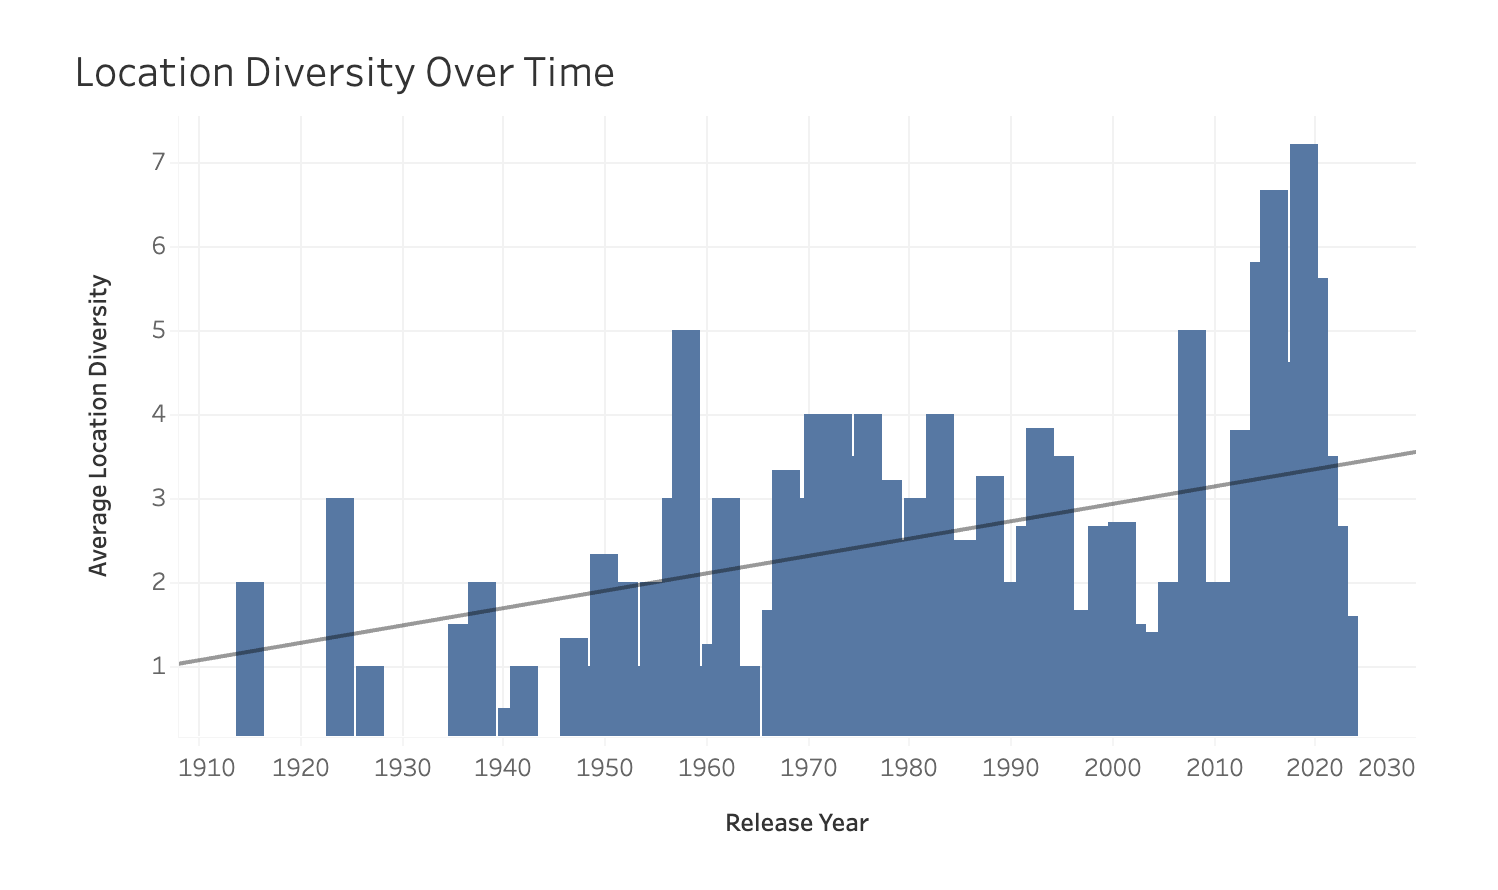

Unfortunately, when it comes to the most expensive, profitable and popular films, diversity still has a ways to go:

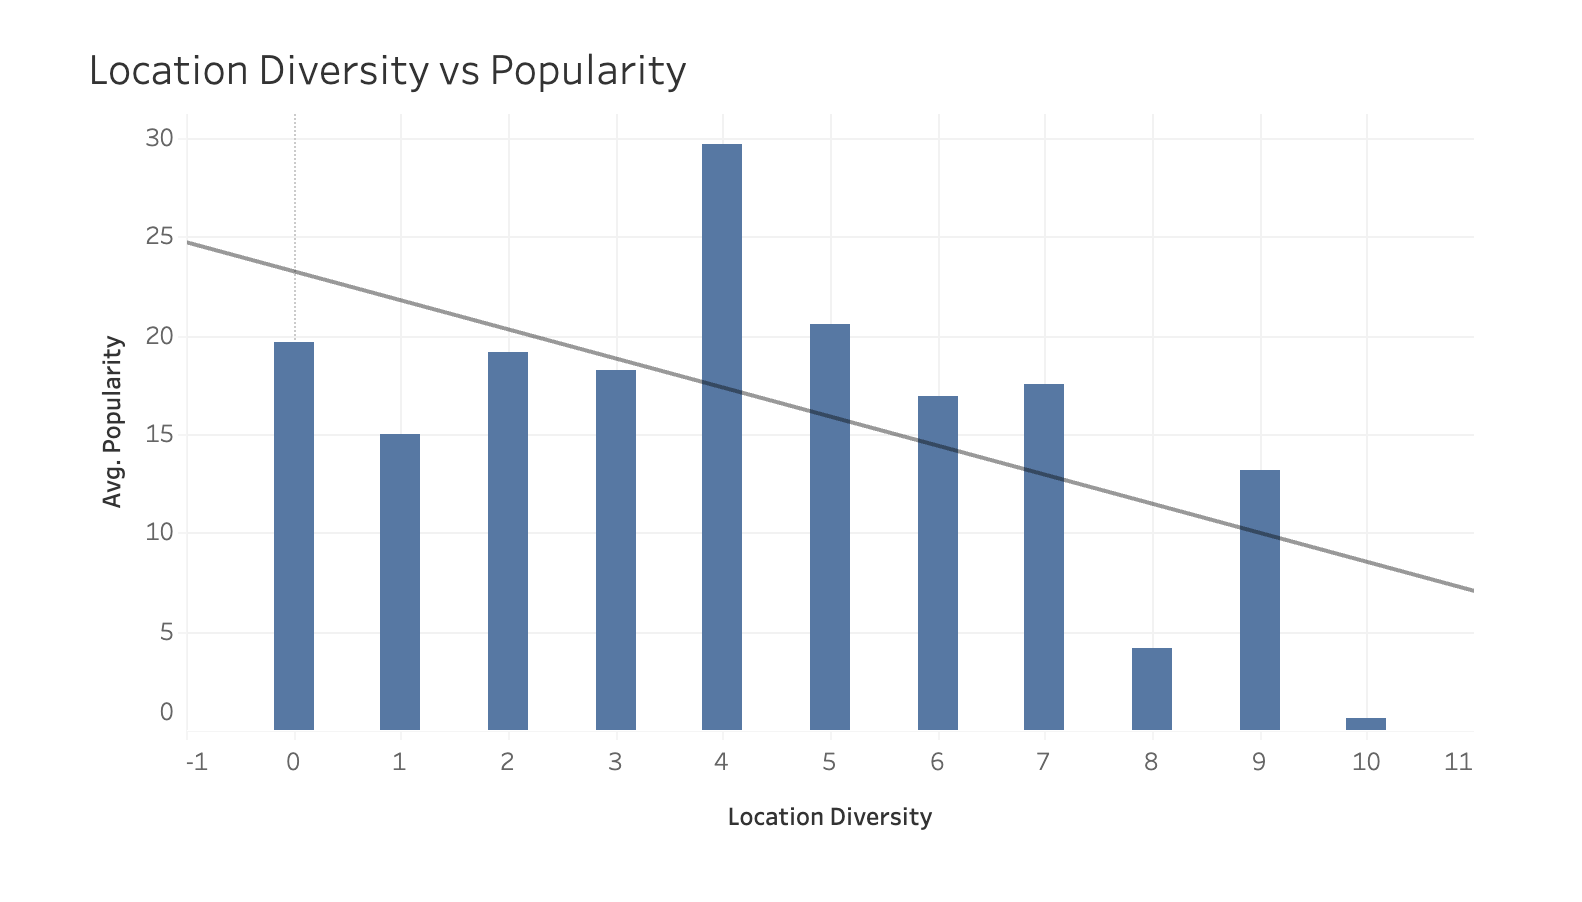

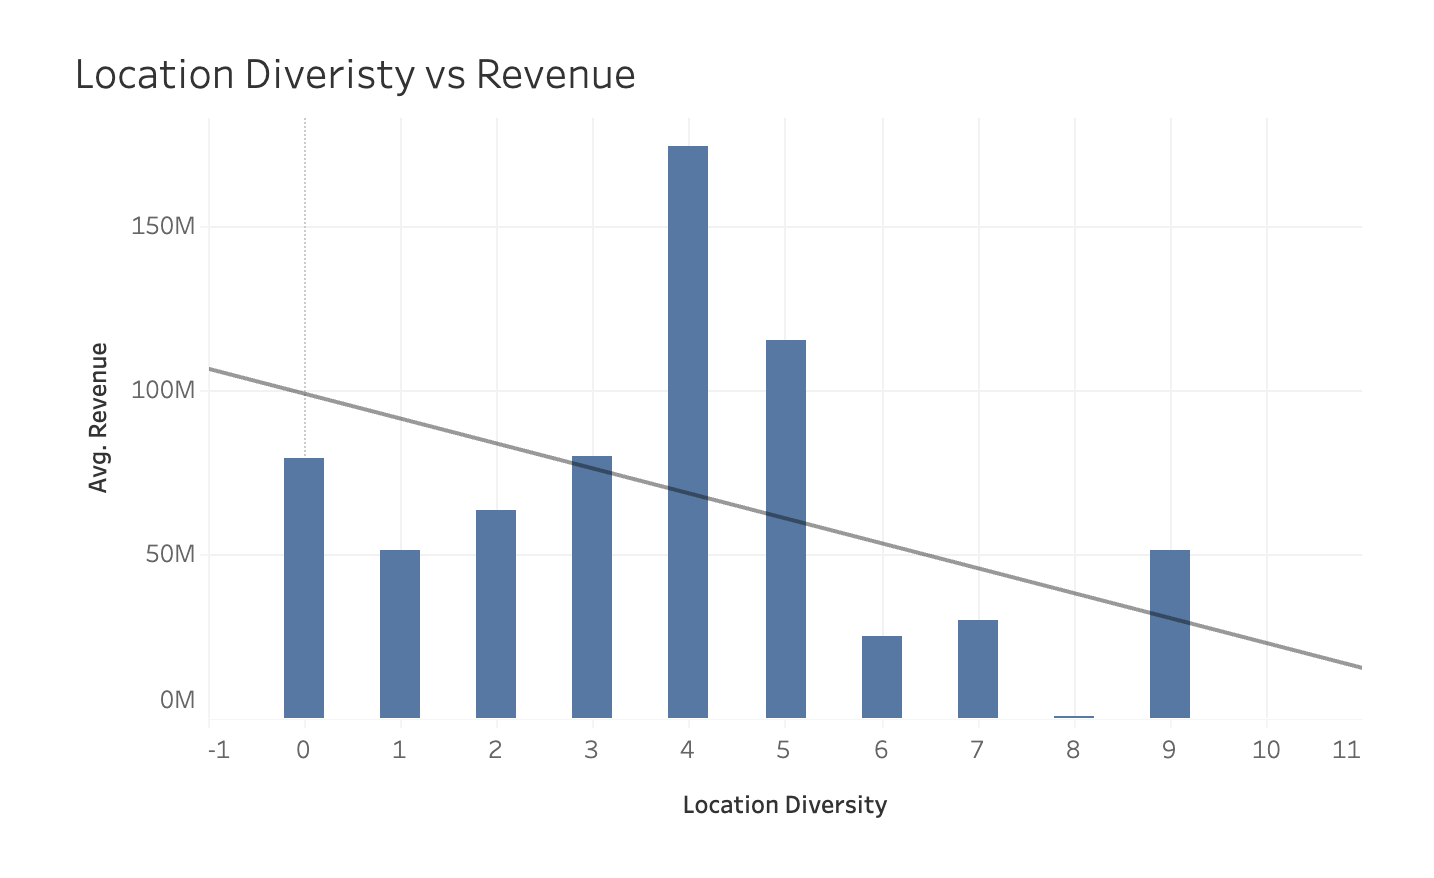

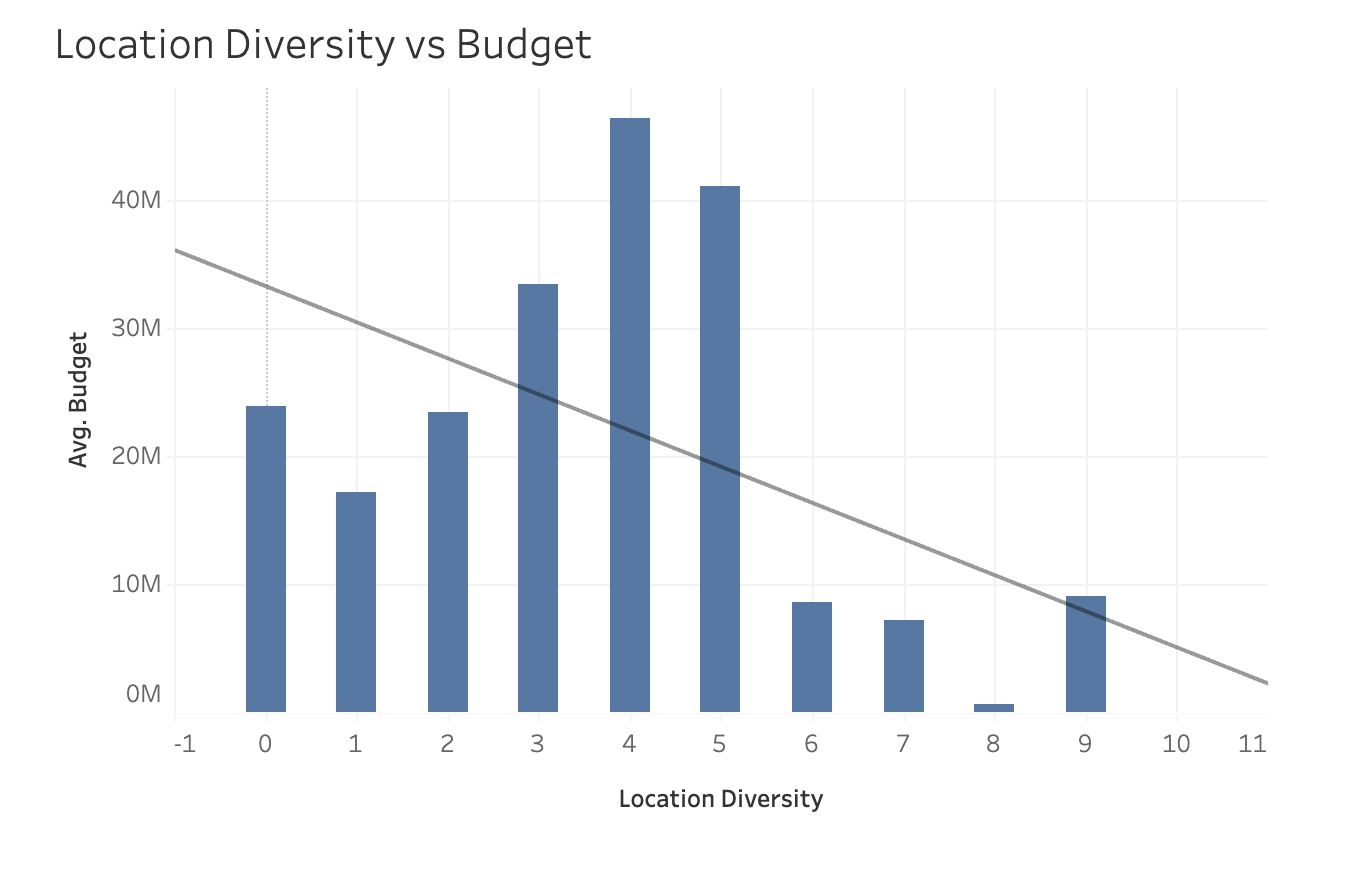
Strong negative correlations exist between district diversity and average budget, revenue, and popularity.

It seems this wasn't always the case. When I filtered the data by release year, I found that before 1976, a bigger budget meant more expansive filming locations:
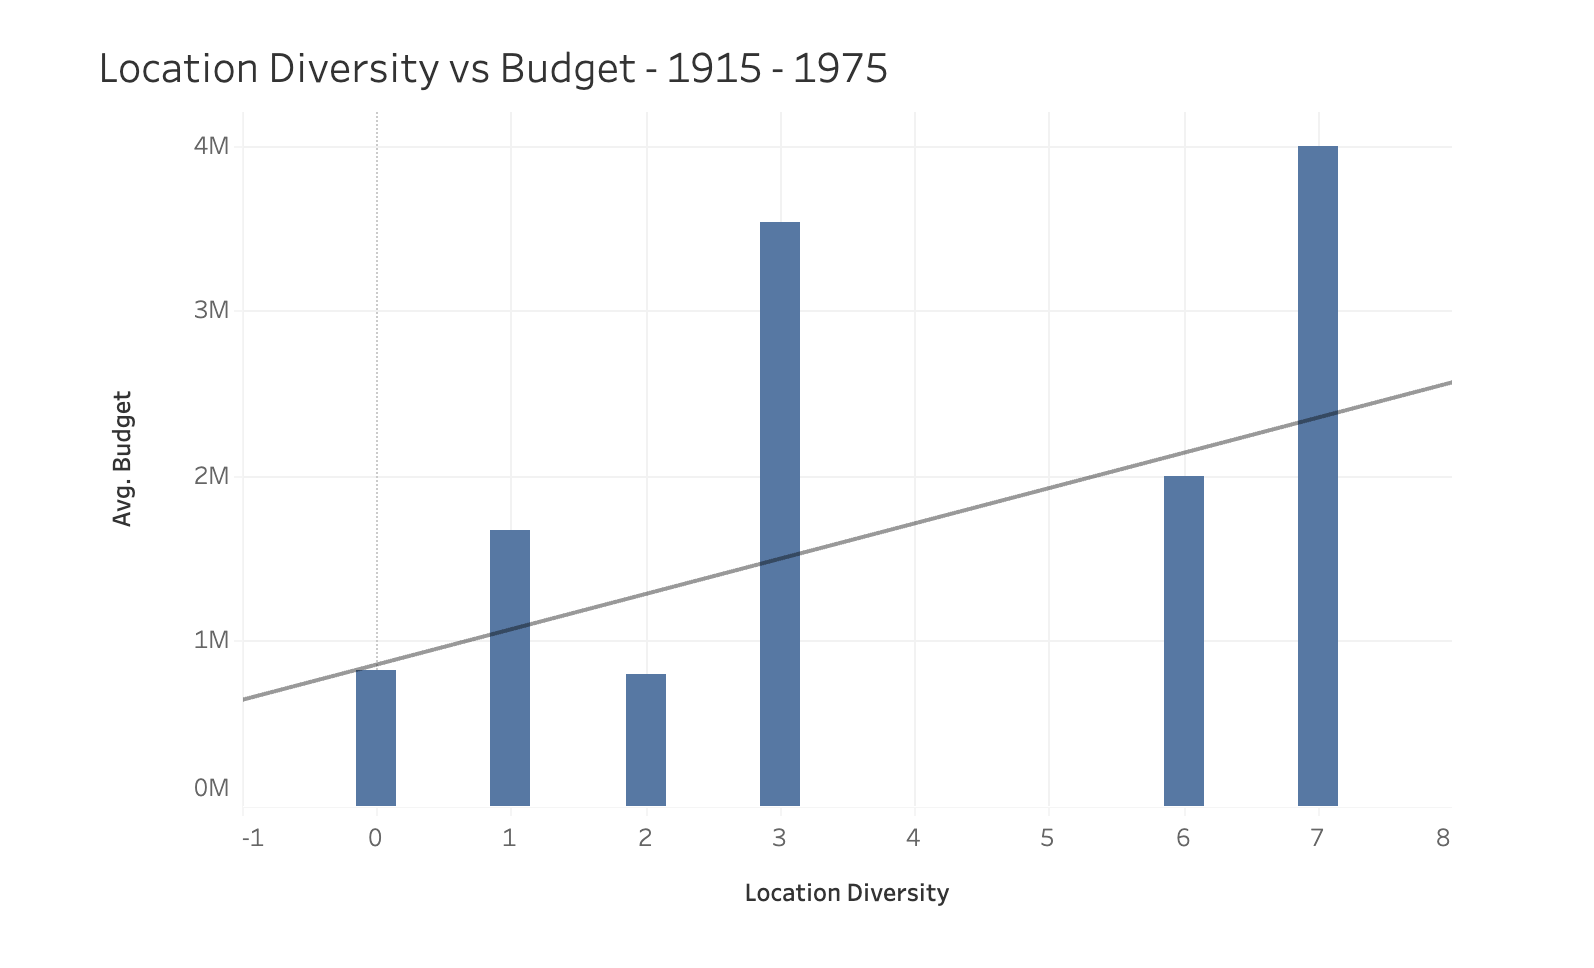

And titles with more location diversity also translated to more revenue and higher popularity:
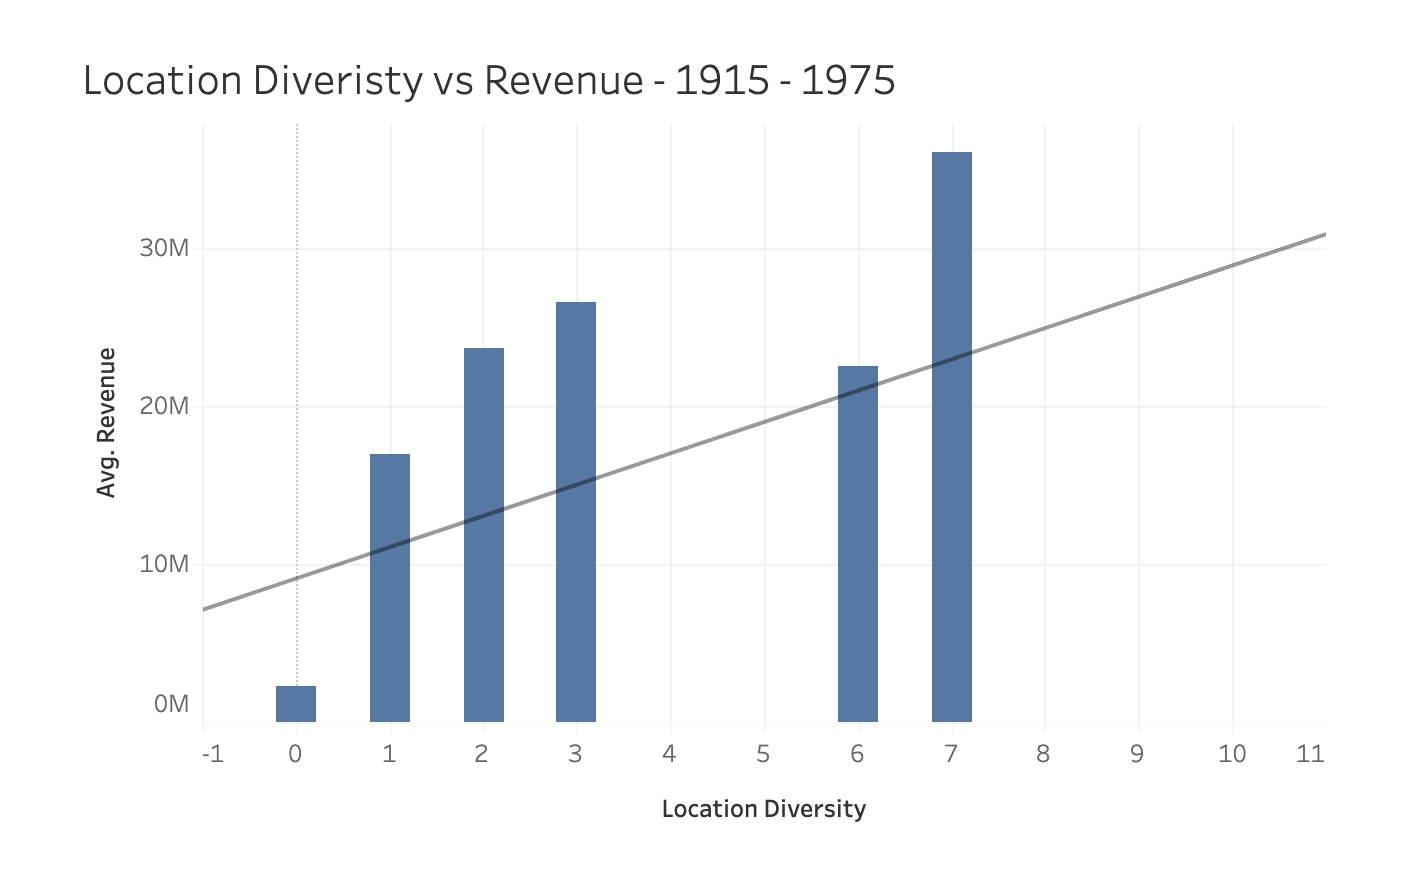

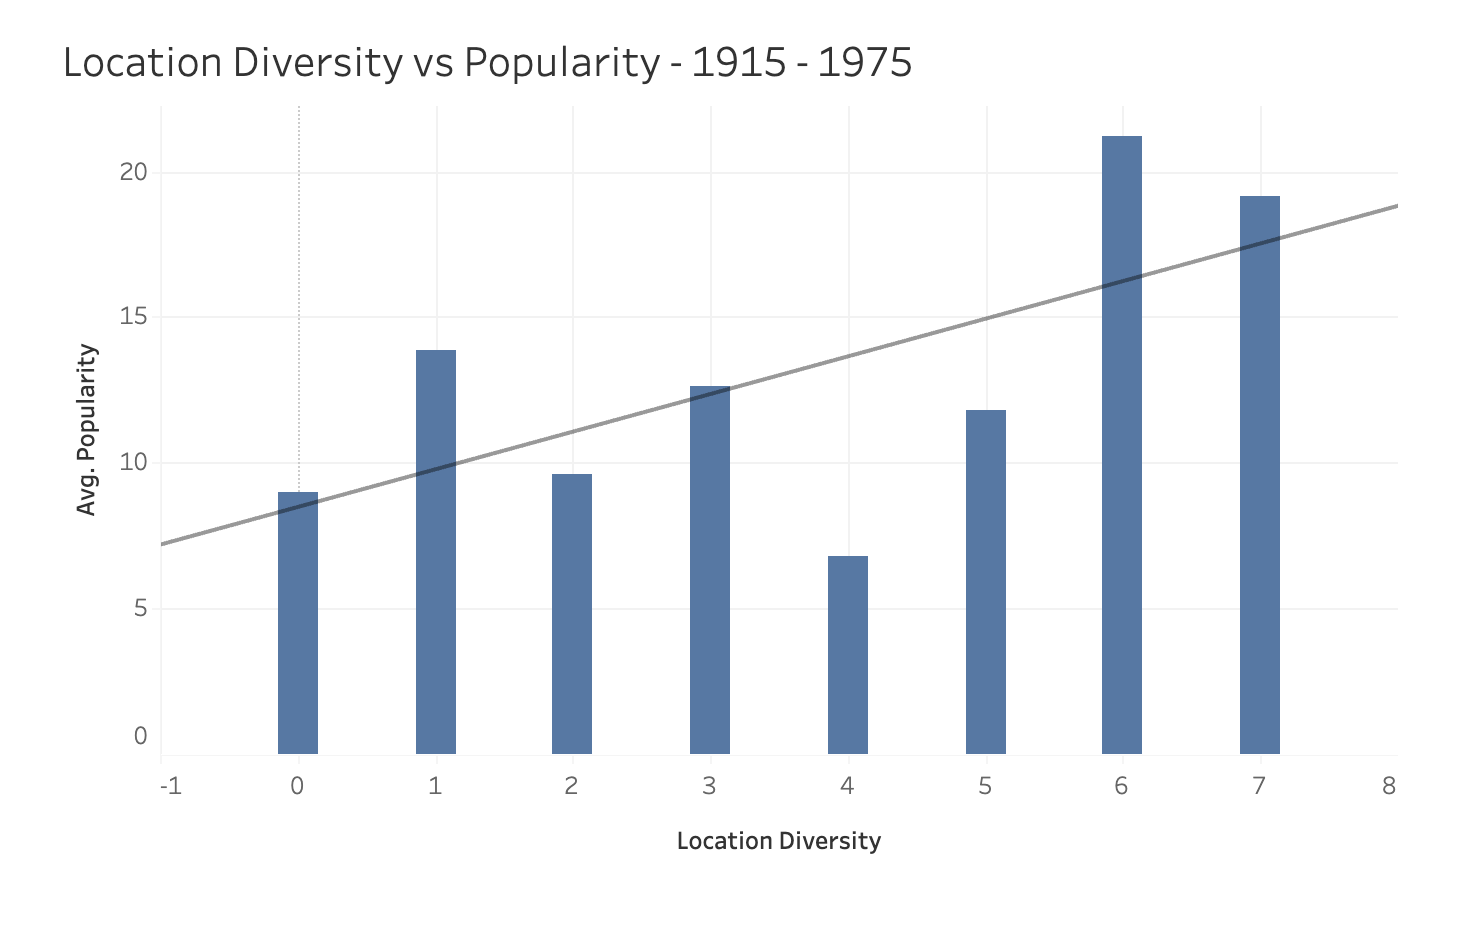

### Key Insights
* Although overall filming locations have increased in number and diversity over the past 100 years, the most expensive and popular films have become less diverse in portrayal of the city over time.
* The bigger a film's budget or revenue, the less likely it is to portray a diverse view of San Francisco.
* Want to get to know the "real" SF? Seek out TV shows primarily set and filmed in the city!

### Interactive Visualization
Check out an interactive dashboard of some of this data [HERE](https://public.tableau.com/app/profile/katelyn.mueller.mclean/viz/SanFranciscoFilmingLocations/Dashboard1#1)

